1. Import data sets and Load data set
Hint: Make use of with statement and write a function to load the data if you are not able to load through the panda's method.


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("C:\\Users\\hp\\Downloads\\2. NPV\\Mini Project 4-1\\Project 4\\bank.csv")
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


DATA DICTIONARY:

1 - age (numeric)

2 - job : type of job (categorical: 
"admin.","unknown","unemployed","management","housemaid","entrepreneur", "student","bluecollar","self-employed","retired","technician","services")

3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means 
divorced or widowed)

4 - education (categorical: "unknown","secondary","primary","tertiary")

5 - default: has credit in default? (binary: "yes","no")

6 - balance: average yearly balance, in euros (numeric)

7 - housing: has a housing loan? (binary: "yes","no")

8 - loan: has personal loan? (binary: "yes","no")

- related to the last contact of the current campaign:

9 - contact: contact communication type (categorical: "unknown","telephone","cellular")

10 - day: last contact day of the month (numeric)

11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")

12 - duration: last contact duration, in seconds (numeric)

- other attributes:

13 - campaign: number of contacts performed during this campaign and for this client (numeric, 
includes the last contact

14 - P-days: number of days that passed by after the client was last contacted from a previous 
campaign (numeric, -1 means client was not previously contacted)

15 - previous: number of contacts performed before this campaign and for this client (numeric)

16 - poutcome: outcome of the previous marketing campaign (categorical: 
"unknown","other","failure","success")

- output variable (desired target):

17 - y - has the client subscribed to a term deposit? (binary: "yes","no")

2. Make the data proper to make use of data for analysis

A. Identify the Features data types before entering into the analysis

B..Convert the datatypes which are wrongly identified according to the business(domain). Kindly use the User Defined function and loop to convert the data types once.

C.Find and Remove missing if any. Use visualization to find the missing values or Use general method to find the missing values.

D. Find duplicates (if necessary)

In [3]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [11]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [13]:
df.describe

<bound method NDFrame.describe of       age            job  marital  education default  balance housing loan  \
0      30     unemployed  married    primary      no     1787      no   no   
1      33       services  married  secondary      no     4789     yes  yes   
2      35     management   single   tertiary      no     1350     yes   no   
3      30     management  married   tertiary      no     1476     yes  yes   
4      59    blue-collar  married  secondary      no        0     yes   no   
...   ...            ...      ...        ...     ...      ...     ...  ...   
4516   33       services  married  secondary      no     -333     yes   no   
4517   57  self-employed  married   tertiary     yes    -3313     yes  yes   
4518   57     technician  married  secondary      no      295      no   no   
4519   28    blue-collar  married  secondary      no     1137      no   no   
4520   44   entrepreneur   single   tertiary      no     1136     yes  yes   

       contact  day month  du

In [14]:
df.info

<bound method DataFrame.info of       age            job  marital  education default  balance housing loan  \
0      30     unemployed  married    primary      no     1787      no   no   
1      33       services  married  secondary      no     4789     yes  yes   
2      35     management   single   tertiary      no     1350     yes   no   
3      30     management  married   tertiary      no     1476     yes  yes   
4      59    blue-collar  married  secondary      no        0     yes   no   
...   ...            ...      ...        ...     ...      ...     ...  ...   
4516   33       services  married  secondary      no     -333     yes   no   
4517   57  self-employed  married   tertiary     yes    -3313     yes  yes   
4518   57     technician  married  secondary      no      295      no   no   
4519   28    blue-collar  married  secondary      no     1137      no   no   
4520   44   entrepreneur   single   tertiary      no     1136     yes  yes   

       contact  day month  dura

In [4]:
df.duplicated().sum()

0

3. Find the average balance of the customer who belongs to the subscribed customer and non-subscribed customer and also use a related plot to show them in visualization.

In [45]:
v=df[df['y']=='yes']
v

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,Season
13,20,student,single,secondary,no,502,no,no,cellular,30,apr,261,1,-1,0,unknown,yes,spring
30,68,retired,divorced,secondary,no,4189,no,no,telephone,14,jul,897,2,-1,0,unknown,yes,summer
33,32,management,single,tertiary,no,2536,yes,no,cellular,26,aug,958,6,-1,0,unknown,yes,summer
34,49,technician,married,tertiary,no,1235,no,no,cellular,13,aug,354,3,-1,0,unknown,yes,summer
36,78,retired,divorced,primary,no,229,no,no,telephone,22,oct,97,1,-1,0,unknown,yes,autumn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4494,26,technician,single,secondary,no,668,yes,no,unknown,28,may,576,3,-1,0,unknown,yes,spring
4503,60,self-employed,married,primary,no,362,no,yes,cellular,29,jul,816,6,-1,0,unknown,yes,summer
4504,42,blue-collar,single,secondary,no,1080,yes,yes,cellular,13,may,951,3,370,4,failure,yes,spring
4505,32,admin.,single,secondary,no,620,yes,no,unknown,26,may,1234,3,-1,0,unknown,yes,spring


In [46]:
v['balance'].mean()

1571.9558541266795

In [28]:
d=df[df['y']=='no']
d

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [48]:
d['balance'].mean()

1403.21175

<AxesSubplot:>

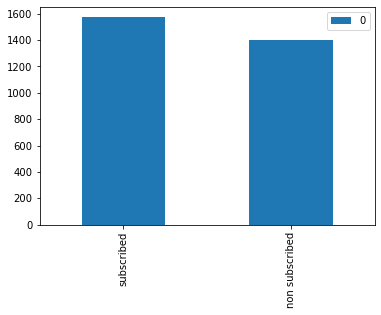

In [54]:
cc=[1571.9558541266795,1403.21175]
c=pd.DataFrame(cc,index=['subscribed','non subscribed'])
c.plot(kind='bar')

4. Use a pie plot to find the distribution(frequency) of the education. Make sure to add labels and show the percentage of each education distribution.

<AxesSubplot:ylabel='education'>

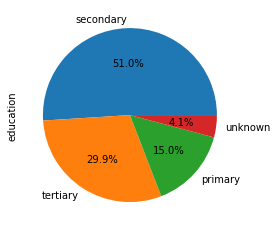

In [8]:
df['education'].value_counts().plot(kind='pie',autopct='%1.1f%%')

5. Create a function that should be able to create a new feature(Variable) called season using the month column.

In [6]:
def season(x):
        if x in ['dec','jan','feb']:
            return 'winter'
        if x in ['mar','apr','may']:
            return 'spring'
        if x in ['jun','jul','aug']:
            return 'summer'
        if x in ['sep','oct','nov']:
            return 'autumn'


In [7]:
df['season']=df.month.apply(season)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,season
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no,autumn
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no,spring
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no,spring
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no,summer
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no,spring


6.Use the count plot with a variable that you created in the above question and also the Y variable to find the class distribution

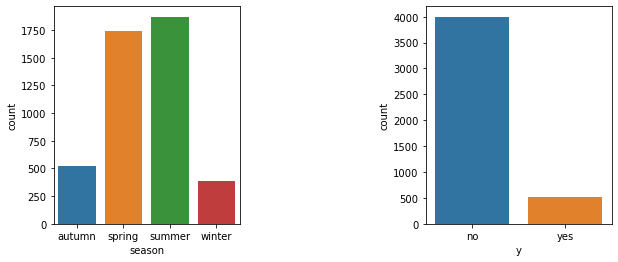

In [19]:
plt.figure(figsize=[10,4])
plt.subplot(1,2,1)

sns.countplot(df.season)

plt.subplot(1,2,2)

sns.countplot(df.y)

plt.subplots_adjust(wspace=1)

7. Use the Pdays feature and find does it cause any effect on the subscription of the term using the bar plot.

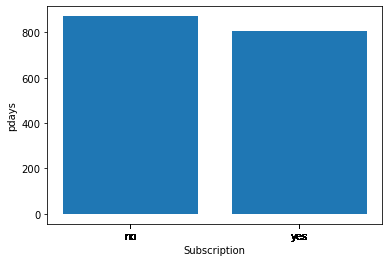

In [5]:
xpositions = df['y']
plt.bar(x = xpositions,height = 'pdays',data = df)
plt.xticks(ticks = xpositions)
plt.xlabel('Subscription')
plt.ylabel('pdays')
plt.show()

8. Replace the -1 as nan values for the P-days store.


In [7]:
df.pdays.replace(-1,value=np.nan,inplace=True)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,NaN,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339.0,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330.0,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,NaN,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,NaN,0,unknown,no


In [8]:
df.pdays.isnull()

0        True
1       False
2       False
3        True
4        True
        ...  
4516     True
4517     True
4518     True
4519    False
4520    False
Name: pdays, Length: 4521, dtype: bool

9. Once you are done with question number 8, do the same analysis as question number 7. And observe the difference between question number 7 and question number 9.


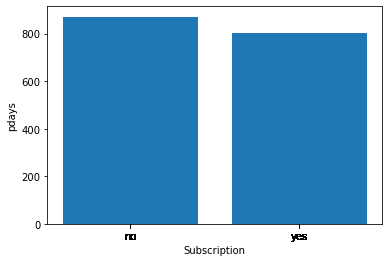

In [9]:
xpositions = df['y']
plt.bar(x = xpositions,height = 'pdays',data = df)
plt.xticks(ticks = xpositions)
plt.xlabel('Subscription')
plt.ylabel('pdays')
plt.show()

10. Does the customer take the term subscription who has less than 0 balance?
Hint: Use any kind of plot which would you the related information to this question.


In [16]:
df_zero_bal=df[df.balance<=0]
df_zero_bal.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,NaN,0,unknown,no
9,43,services,married,primary,no,-88,yes,yes,cellular,17,apr,313,1,147.0,2,failure,no
18,25,blue-collar,single,primary,no,-221,yes,no,unknown,23,may,250,1,NaN,0,unknown,no
20,38,management,divorced,unknown,no,0,yes,no,cellular,18,nov,96,2,NaN,0,unknown,no
47,26,blue-collar,married,primary,no,0,yes,no,unknown,21,may,425,1,NaN,0,unknown,no


<AxesSubplot:ylabel='y'>

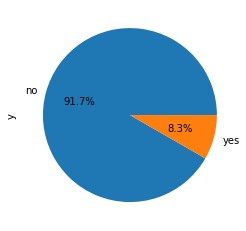

In [17]:
df_zero_bal.y.value_counts().plot(kind='pie',autopct='%1.1f%%')

#### yes,customers can take the term subscription who has less than 0 balance.

11. Use Pivot table to find the maximum balance for each type of job.


In [71]:
pd.pivot_table(df,index='job',values=['balance'],aggfunc='max')

,balance
job,
admin.,22171
blue-collar,16353
entrepreneur,42045
housemaid,26965
management,27359
retired,71188
self-employed,16430
services,26394
student,11555


12. Use the Age, balance, and Y column to plot the scatter plot and find what kind of relationship Age and balance had, and See the points which belong 0 and 1 class and how they are distributed.

<AxesSubplot:xlabel='age', ylabel='balance'>

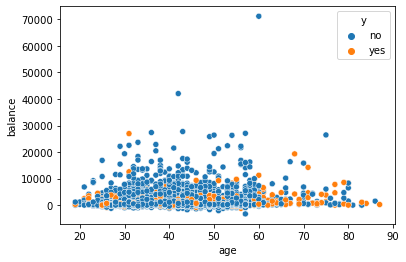

In [19]:
sns.scatterplot(data=df,x='age',y='balance',hue='y')

#### we can obeserve that people with balance more than 15000 had not taken subscription

13. Use the violin plot and also the box plot to find the distribution of the balance for each class of the Y column. And try to tell why we have a Violin plot and Box plot both rather than one.


<AxesSubplot:xlabel='y', ylabel='balance'>

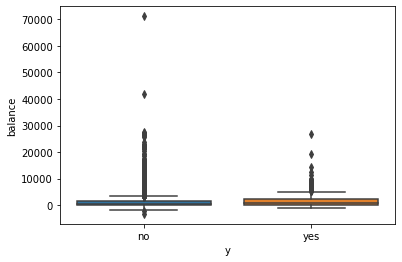

In [13]:
sns.boxplot(y='balance',x='y',data=df)

<AxesSubplot:xlabel='y', ylabel='balance'>

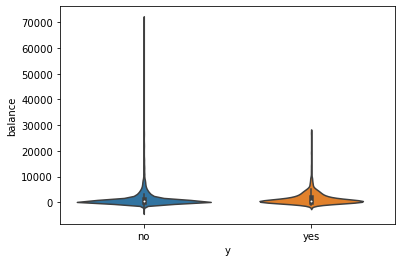

In [14]:
sns.violinplot(y='balance',x='y',data=df)

####  A violin plot is more informative than  plain box plot. While a box plot only shows summary statistics such as mean/median and interquartile ranges, the violin plot shows the full distribution of the data

14. Use a pie plot to know the Proportion(distribution) of the defaulters and non-defaulters.
Note: Try to explore more parameters that are there in the pie-plot method.


<AxesSubplot:ylabel='default'>

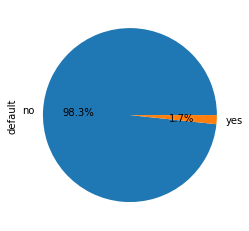

In [15]:
df.default.value_counts().plot(kind='pie',autopct='%1.1f%%')

15. Use Box plot and strip plot to know the distribution of the Pdays with respect to Y classes and differentiate both plots.

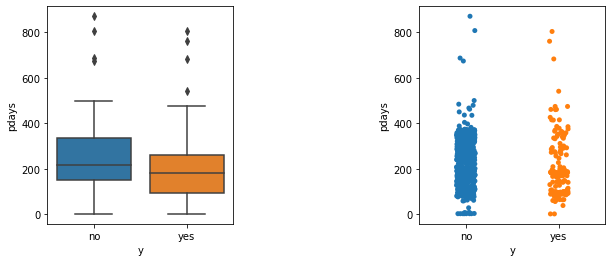

In [20]:
plt.figure(figsize=[10,4])
plt.subplot(1,2,1)

sns.boxplot(x=df.y,y=df.pdays)

plt.subplot(1,2,2)

sns.stripplot(x=df.y,y=df.pdays)

plt.subplots_adjust(wspace=1)